In [1]:
import math
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from numba import jit
from scipy import stats
from sklearn.preprocessing import StandardScaler
from tqdm import notebook
import seaborn as sns
from matplotlib.colors import ListedColormap

/opt/anaconda3/envs/asoid_test/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/opt/anaconda3/envs/asoid_test/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_or

In [3]:
active_predict = []
iter0_predict = []
unbal_predict = []

active_feats = []
iter0_feats = []
unbal_feats = []

active_targets = []
iter0_targets = []
unbal_targets = []

active_models = []
iter0_models = []
unbal_models = []
for i in notebook.tqdm(range(20)):
    with open(f'../models/active/iter20/model_seed{i}.pkl', 'rb') as fr:
        [model, features, targets, predict] = pickle.load(fr)
    active_predict.append(predict)
    active_feats.append(features)
    active_targets.append(targets)
    active_models.append(model)
    with open(f'../models/active/iter0/model_seed{i}.pkl', 'rb') as fr:
        [model, features, targets, predict] = pickle.load(fr)
    iter0_predict.append(predict)
    iter0_feats.append(features)
    iter0_targets.append(targets)
    iter0_models.append(model)
    with open(f'../models/unbalanced/model_seed{i}.pkl', 'rb') as fr:
        [model, features, targets, predict] = pickle.load(fr)
    unbal_predict.append(predict)
    unbal_feats.append(features)
    unbal_targets.append(targets)
    unbal_models.append(model)
with open('../processed_data/iter0_rftreeshap_object_test.pkl', 'rb') as fr:
    [explainer_iter0, shap_values_iter0, expected_values_iter0] = pickle.load(fr)
with open('../processed_data/active_rftreeshap_object_test.pkl', 'rb') as fr:
    [explainer_iter20, shap_values_iter20, expected_values_iter20] = pickle.load(fr)
with open('../processed_data/unbalanced_rftreeshap_object_test.pkl', 'rb') as fr:
    [explainer_unbal, shap_values_unbal, expected_values_unbal] = pickle.load(fr)

  0%|          | 0/20 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '../models/active/iter20/model_seed0.pkl'

In [2]:
with open('../../processed_data/iter0_rftreeshap_object_test.pkl', 'rb') as fr:
    [explainer_iter0, shap_values_iter0, expected_values_iter0] = pickle.load(fr)
with open('../../processed_data/active_rftreeshap_object_test.pkl', 'rb') as fr:
    [explainer_iter20, shap_values_iter20, expected_values_iter20] = pickle.load(fr)
with open('../../processed_data/unbalanced_rftreeshap_object_test.pkl', 'rb') as fr:
    [explainer_unbal, shap_values_unbal, expected_values_unbal] = pickle.load(fr)

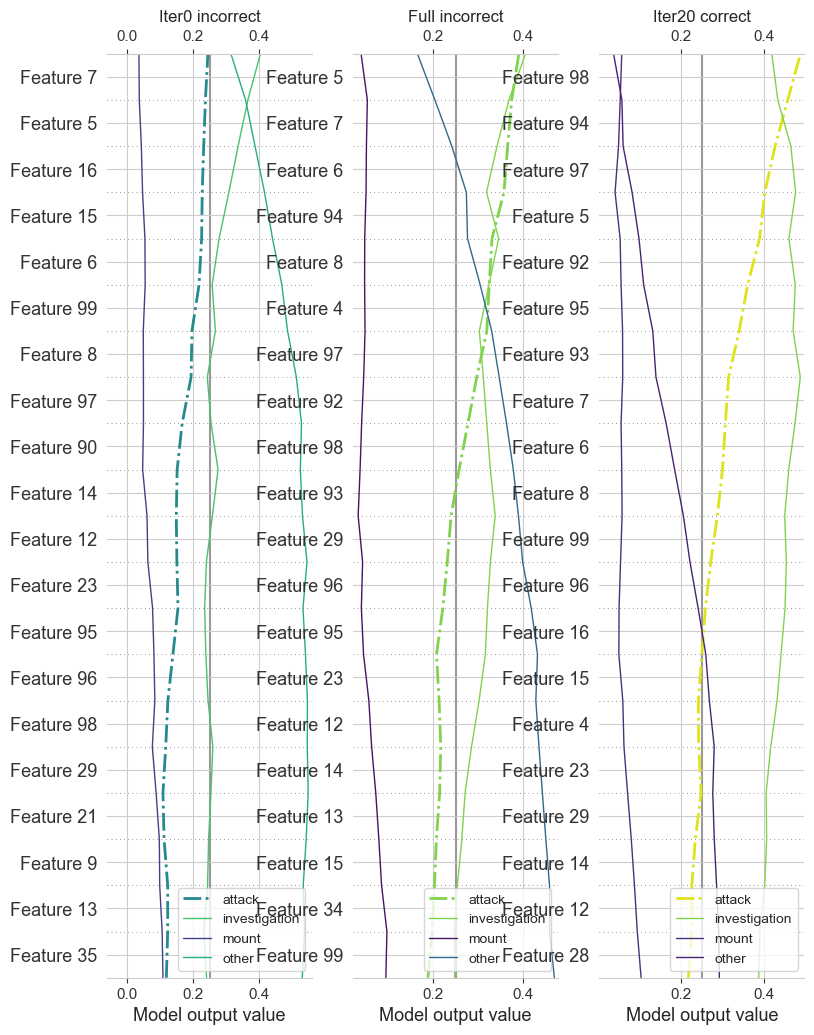

In [293]:
example_num = 100
class_labels = ['attack', 'investigation', 'mount', 'other']
row_index = idx_notother[list(improvement_active_idx)[example_num]]
fig = plt.figure()
ax0 = fig.add_subplot(131)
# plt.suptitle('learning')
my_cmap = ListedColormap(sns.color_palette("viridis", 20).as_hex())
iter0_ex_result_atk = shap.multioutput_decision_plot(list(expected_values_iter0),
                               shap_values_iter0,
                               row_index=row_index,
                               # feature_names=heart_feature_names,
                               highlight=int(targets_test[row_index]),
                               legend_labels=class_labels,
                               legend_location='lower right',
                               show=False,
                               feature_display_range=slice(-1, -21, -1),
                               plot_color=my_cmap,
                               color_bar=False,
                               return_objects=True
                               )
ax0.set_title('Iter0 incorrect')
top10_iter0_atk = [int(iter0_ex_result_atk.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(iter0_ex_result_atk.feature_names[::-1][:10]))]

ax1 = fig.add_subplot(132)
unbal_ex_result_atk = shap.multioutput_decision_plot(list(expected_values_unbal),
                               shap_values_unbal,
                               row_index=row_index,
                               # feature_names=heart_feature_names,
                               highlight=int(targets_test[row_index]),
                               legend_labels=class_labels,
                               legend_location='lower right',
                               show=False,
                               feature_display_range=slice(-1, -21, -1),
                               plot_color=my_cmap,
                               color_bar=False,
                               return_objects=True
                               )
ax1.set_title('Full incorrect')
top10_unbal_atk = [int(unbal_ex_result_atk.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(unbal_ex_result_atk.feature_names[::-1][:10]))]

ax2 = fig.add_subplot(133)
iter20_ex_result_atk = shap.multioutput_decision_plot(list(expected_values_iter20),
                               shap_values_iter20,
                               row_index=row_index,
                               # feature_names=heart_feature_names,
                               highlight=int(targets_test[row_index]),
                               legend_labels=class_labels,
                               legend_location='lower right',
                               show=False,
                               feature_display_range=slice(-1, -21, -1),
                               plot_color=my_cmap,
                               color_bar=False,
                               return_objects=True
                               )
ax2.set_title('Iter20 correct')
top10_iter20_atk = [int(iter20_ex_result_atk.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(iter20_ex_result_atk.feature_names[::-1][:10]))]

plt.gcf().set_size_inches(9, 12)
plt.show()
# fig.savefig(f'../figures/decision_plot_iter0_unbal_iter20_{class_labels[int(targets_test[row_index])]}.svg', dpi=600)

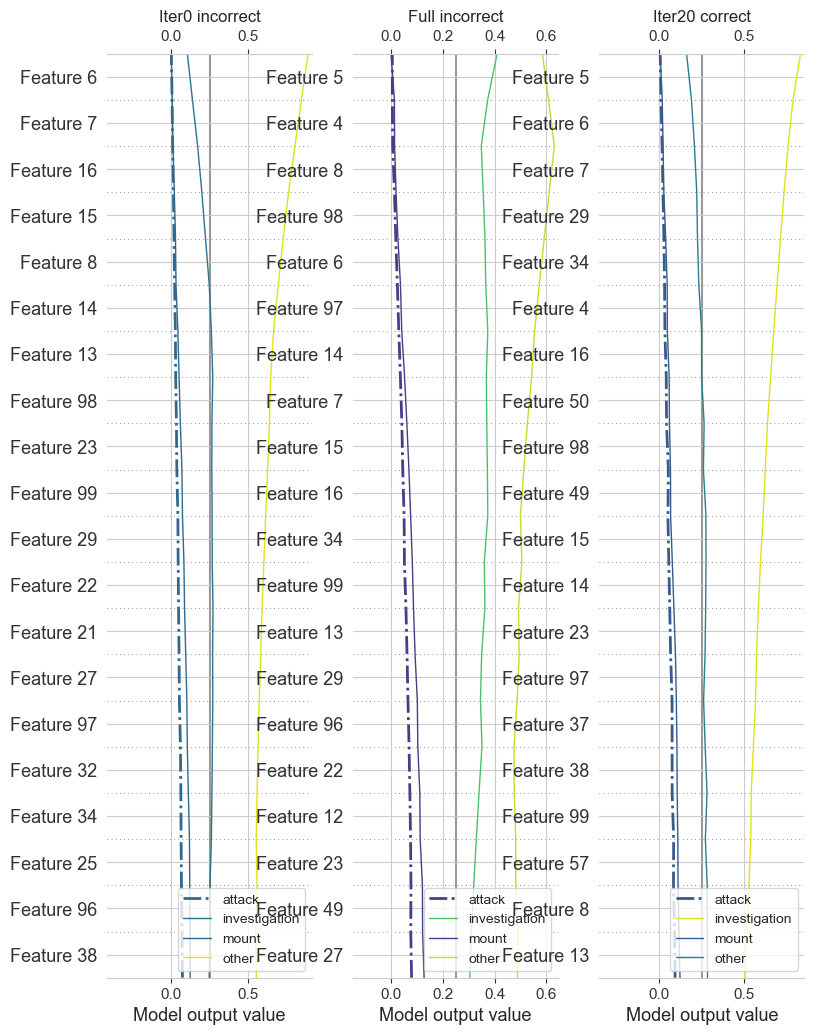

In [10]:
example_num = 2
class_labels = ['attack', 'investigation', 'mount', 'other']
row_index = idx_notother[list(improvement_active_idx)[example_num]]
# row_index = idx_notother[1]
fig = plt.figure()
ax0 = fig.add_subplot(131)
# plt.suptitle('learning')
my_cmap = ListedColormap(sns.color_palette("viridis", 20).as_hex())
iter0_ex_result_inv = shap.multioutput_decision_plot(list(expected_values_iter0),
                               shap_values_iter0,
                               row_index=row_index,
                               # feature_names=heart_feature_names,
                               # highlight=int(targets_test[row_index]),
                               highlight=0,
                               legend_labels=class_labels,
                               legend_location='lower right',
                               show=False,
                               feature_display_range=slice(-1, -21, -1),
                               plot_color=my_cmap,
                               color_bar=False,
                               return_objects=True
                               )
ax0.set_title('Iter0 incorrect')
top10_iter0_inv = [int(iter0_ex_result_inv.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(iter0_ex_result_inv.feature_names[::-1][:10]))]

ax1 = fig.add_subplot(132)
unbal_ex_result_inv = shap.multioutput_decision_plot(list(expected_values_unbal),
                               shap_values_unbal,
                               row_index=row_index,
                               # feature_names=heart_feature_names,
                               # highlight=int(targets_test[row_index]),
                               highlight=0,
                               legend_labels=class_labels,
                               legend_location='lower right',
                               show=False,
                               feature_display_range=slice(-1, -21, -1),
                               plot_color=my_cmap,
                               color_bar=False,
                               return_objects=True
                               )
ax1.set_title('Full incorrect')
top10_unbal_inv = [int(unbal_ex_result_inv.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(unbal_ex_result_inv.feature_names[::-1][:10]))]

ax2 = fig.add_subplot(133)
iter20_ex_result_inv = shap.multioutput_decision_plot(list(expected_values_iter20),
                               shap_values_iter20,
                               row_index=row_index,
                               # feature_names=heart_feature_names,
                               # highlight=int(targets_test[row_index]),
                               highlight=0,
                               legend_labels=class_labels,
                               legend_location='lower right',
                               show=False,
                               feature_display_range=slice(-1, -21, -1),
                               plot_color=my_cmap,
                               color_bar=False,
                               return_objects=True
                               )
ax2.set_title('Iter20 correct')
top10_iter20_inv = [int(iter20_ex_result_inv.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(iter20_ex_result_inv.feature_names[::-1][:10]))]

plt.gcf().set_size_inches(9, 12)
plt.show()
# fig.savefig(f'../figures/decision_plot_iter0_unbal_iter20_{class_labels[int(targets_test[row_index])]}.svg', dpi=600)

  0%|          | 0/991 [00:00<?, ?it/s]

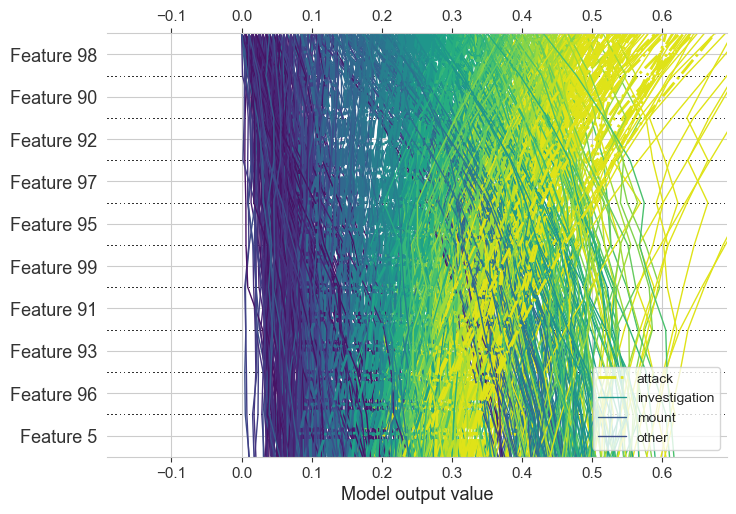

In [159]:
example_nums = np.arange(0, len(list(improvement_active_idx)))
class_labels = ['attack', 'investigation', 'mount', 'other']
my_cmap = ListedColormap(sns.color_palette("viridis", 20).as_hex())
iter0_topfeatures_atk = []
unbal_topfeatures_atk = []
iter20_topfeatures_atk = []
for example_num in notebook.tqdm(example_nums):
    row_index = idx_notother[list(improvement_active_idx)[example_num]]
    if int(targets_test[row_index]) == 0:
        iter0_decision_plot_result = shap.multioutput_decision_plot(list(expected_values_iter0),
                                       shap_values_iter0,
                                       row_index=row_index,
                                       # feature_names=heart_feature_names,
                                       highlight=int(targets_test[row_index]),
                                       legend_labels=class_labels,
                                       legend_location='lower right',
                                       show=False,
                                       feature_display_range=slice(-1, -11, -1),
                                       plot_color=my_cmap,
                                       color_bar=False,
                                       return_objects=True,
                                       )
        iter0_topfeatures_atk.append([int(iter0_decision_plot_result.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(iter0_decision_plot_result.feature_names[::-1][:10]))])
        unbal_decision_plot_result = shap.multioutput_decision_plot(list(expected_values_unbal),
                                       shap_values_unbal,
                                       row_index=row_index,
                                       # feature_names=heart_feature_names,
                                       highlight=int(targets_test[row_index]),
                                       legend_labels=class_labels,
                                       legend_location='lower right',
                                       show=False,
                                       feature_display_range=slice(-1, -11, -1),
                                       plot_color=my_cmap,
                                       color_bar=False,
                                       return_objects=True
                                       )
        unbal_topfeatures_atk.append([int(unbal_decision_plot_result.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(unbal_decision_plot_result.feature_names[::-1][:10]))])
        iter20_decision_plot_result = shap.multioutput_decision_plot(list(expected_values_iter20),
                                       shap_values_iter20,
                                       row_index=row_index,
                                       # feature_names=heart_feature_names,
                                       highlight=int(targets_test[row_index]),
                                       legend_labels=class_labels,
                                       legend_location='lower right',
                                       show=False,
                                       feature_display_range=slice(-1, -11, -1),
                                       plot_color=my_cmap,
                                       color_bar=False,
                                       return_objects=True
                                       )
        iter20_topfeatures_atk.append([int(iter20_decision_plot_result.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(iter20_decision_plot_result.feature_names[::-1][:10]))])

In [160]:
iter0_bins, iter0_edges = np.histogram(np.hstack(iter0_topfeatures_atk), bins=[0, 45, 90, 100])

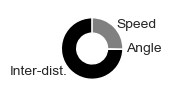

In [166]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = iter0_bins.copy()
pie_colors = ['black', 'cadetblue', 'grey']
pie_labels = ['Inter-dist.', 'Angle', 'Speed']
fig, ax = plt.subplots(1, 1, figsize=(2, 1))
explode = [0, 0, 0]
wedges, texts = ax.pie(sizes,
                       labels=pie_labels,
                       explode=explode,
                       colors=pie_colors,
                       wedgeprops=dict(width=0.5),
                       startangle=90)

# ax.set_title("Top 5 impactful")

plt.show()
fig.savefig('../figures/iter0_top10_impactful_decisions_atk_3.svg', dpi=600)

In [162]:
unbal_bins, unbal_edges = np.histogram(np.hstack(unbal_topfeatures_atk), bins=[0, 45, 90, 100])

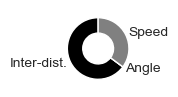

In [167]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = unbal_bins.copy()
pie_colors = ['black', 'cadetblue', 'grey']
pie_labels = ['Inter-dist.', 'Angle', 'Speed']
fig, ax = plt.subplots(1, 1, figsize=(2, 1))
explode = [0, 0, 0]
wedges, texts = ax.pie(sizes,
                       labels=pie_labels,
                       explode=explode,
                       colors=pie_colors,
                       wedgeprops=dict(width=0.5),
                       startangle=90)

# ax.set_title("Top 5 impactful")

plt.show()
fig.savefig('../figures/unbal_top10_impactful_decisions_atk_3.svg', dpi=600)

In [164]:
iter20_bins, iter20_edges = np.histogram(np.hstack(iter20_topfeatures_atk), bins=[0, 45, 90, 100])

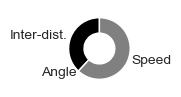

In [168]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = iter20_bins.copy()
pie_colors = ['black', 'cadetblue', 'grey']
pie_labels = ['Inter-dist.', 'Angle', 'Speed']
fig, ax = plt.subplots(1, 1, figsize=(2, 1))
explode = [0, 0, 0]
wedges, texts = ax.pie(sizes,
                       labels=pie_labels,
                       explode=explode,
                       colors=pie_colors,
                       wedgeprops=dict(width=0.5),
                       startangle=90)

# ax.set_title("Top 5 impactful")

plt.show()
fig.savefig('../figures/iter20_top10_impactful_decisions_atk_3.svg', dpi=600)

In [187]:
idx_notother[-1]

21829

  0%|          | 0/991 [00:00<?, ?it/s]

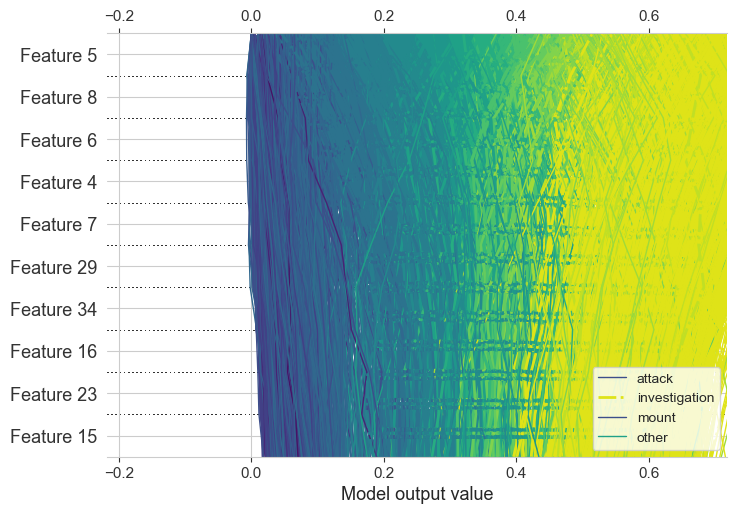

In [277]:
example_nums = np.arange(0, len(list(improvement_active_idx)))
class_labels = ['attack', 'investigation', 'mount', 'other']
my_cmap = ListedColormap(sns.color_palette("viridis", 20).as_hex())
iter0_topfeatures_inv = []
unbal_topfeatures_inv = []
iter20_topfeatures_inv = []
row_index_inv = []
for example_num in notebook.tqdm(example_nums):
    row_index = idx_notother[list(improvement_active_idx)[example_num]]
    if int(targets_test[row_index]) == 1:
        row_index_inv.append(row_index)
        iter0_decision_plot_result = shap.multioutput_decision_plot(list(expected_values_iter0),
                                       shap_values_iter0,
                                       row_index=row_index,
                                       # feature_names=heart_feature_names,
                                       highlight=int(targets_test[row_index]),
                                       legend_labels=class_labels,
                                       legend_location='lower right',
                                       show=False,
                                       feature_display_range=slice(-1, -11, -1),
                                       plot_color=my_cmap,
                                       color_bar=False,
                                       return_objects=True
                                       )
        iter0_topfeatures_inv.append([int(iter0_decision_plot_result.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(iter0_decision_plot_result.feature_names[::-1][:10]))])
        unbal_decision_plot_result = shap.multioutput_decision_plot(list(expected_values_unbal),
                                       shap_values_unbal,
                                       row_index=row_index,
                                       # feature_names=heart_feature_names,
                                       highlight=int(targets_test[row_index]),
                                       legend_labels=class_labels,
                                       legend_location='lower right',
                                       show=False,
                                       feature_display_range=slice(-1, -11, -1),
                                       plot_color=my_cmap,
                                       color_bar=False,
                                       return_objects=True,
                                       )
        unbal_topfeatures_inv.append([int(unbal_decision_plot_result.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(unbal_decision_plot_result.feature_names[::-1][:10]))])
        iter20_decision_plot_result = shap.multioutput_decision_plot(list(expected_values_iter20),
                                       shap_values_iter20,
                                       row_index=row_index,
                                       # feature_names=heart_feature_names,
                                       highlight=int(targets_test[row_index]),
                                       legend_labels=class_labels,
                                       legend_location='lower right',
                                       show=False,
                                       feature_display_range=slice(-1, -11, -1),
                                       plot_color=my_cmap,
                                       color_bar=False,
                                       return_objects=True
                                       )
        iter20_topfeatures_inv.append([int(iter20_decision_plot_result.feature_names[::-1][:10][j].rpartition('Feature ')[2]) for j in range(len(iter20_decision_plot_result.feature_names[::-1][:10]))])

In [278]:
iter0_bins, iter0_edges = np.histogram(np.hstack(iter0_topfeatures_inv), bins=[0, 45, 90, 100])

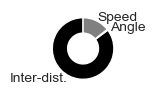

In [279]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = iter0_bins.copy()
pie_colors = ['black', 'cadetblue', 'grey']
pie_labels = ['Inter-dist.', 'Angle', 'Speed']
explode = [0, 0, 0]
fig, ax = plt.subplots(1, 1, figsize=(2, 1))
wedges, texts = ax.pie(sizes,
                       labels=pie_labels,
                       explode=explode,
                       colors=pie_colors,
                       wedgeprops=dict(width=0.5),
                       startangle=90,
                       )

# ax.set_title("Top 5 impactful")

plt.show()
# fig.savefig('../figures/iter0_top10_impactful_decisions_inv_3.svg', dpi=600)

In [280]:
unbal_bins, unbal_edges = np.histogram(np.hstack(unbal_topfeatures_inv), bins=[0, 45, 90, 100])

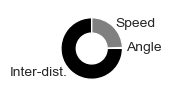

In [281]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = unbal_bins.copy()
pie_colors = ['black', 'cadetblue', 'grey']
pie_labels = ['Inter-dist.', 'Angle', 'Speed']
fig, ax = plt.subplots(1, 1, figsize=(2, 1))
explode = [0, 0, 0]
wedges, texts = ax.pie(sizes,
                       labels=pie_labels,
                       explode=explode,
                       colors=pie_colors,
                       wedgeprops=dict(width=0.5),
                       startangle=90)

# ax.set_title("Top 5 impactful")

plt.show()
# fig.savefig('../figures/unbal_top10_impactful_decisions_inv_3.svg', dpi=600)

In [282]:
iter20_bins, iter20_edges = np.histogram(np.hstack(iter20_topfeatures_inv), bins=[0, 45, 90, 100])

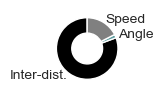

In [283]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = iter20_bins.copy()
pie_colors = ['black', 'cadetblue', 'grey']
pie_labels = ['Inter-dist.', 'Angle', 'Speed']
explode = [0, 0, 0]
fig, ax = plt.subplots(1, 1, figsize=(2, 1))
wedges, texts = ax.pie(sizes,
                       labels=pie_labels,
                       explode=explode,
                       colors=pie_colors,
                       wedgeprops=dict(width=0.5),
                       startangle=90,
                       )

# ax.set_title("Top 5 impactful")

plt.show()
# fig.savefig('../figures/iter20_top10_impactful_decisions_inv_3.svg', dpi=600)

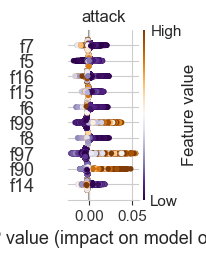

In [294]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()

ax1 = fig.add_subplot(111)
shap.summary_plot(np.vstack(shap_values_iter0[0][:, np.array(top10_iter0_atk)]),
                  np.vstack(test_scaled_features[:, np.array(top10_iter0_atk)]),
                  # plot_type='violin',
                  # class_inds=np.arange(10, 0, -1),
                  feature_names=[f'f{i}' for i in np.array(top10_iter0_atk)],
                  max_display=10, show=False, sort=False,
                  cmap='PuOr_r')
ax1.set_title(behaviors[0])

plt.gcf().set_size_inches(1, 2)
plt.show()
fig.savefig(f'../figures/summary_plot_iter0_decision_{class_labels[int(targets_test[row_index])]}_3.svg', dpi=600)

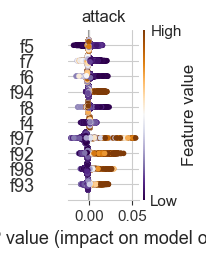

In [295]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()

ax1 = fig.add_subplot(111)
shap.summary_plot(np.vstack(shap_values_iter0[0][:, np.array(top10_unbal_atk)]),
                  np.vstack(test_scaled_features[:, np.array(top10_unbal_atk)]),
                  # plot_type='violin',
                  # class_inds=np.arange(10, 0, -1),
                  feature_names=[f'f{i}' for i in np.array(top10_unbal_atk)],
                  max_display=10, show=False, sort=False,
                  cmap='PuOr_r')
ax1.set_title(behaviors[0])

plt.gcf().set_size_inches(1, 2)
plt.show()
fig.savefig(f'../figures/summary_plot_unbal_decision_{class_labels[int(targets_test[row_index])]}_3.svg', dpi=600)

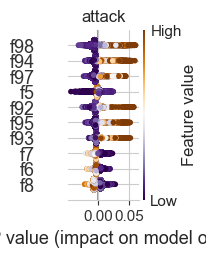

In [297]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()
ax1 = fig.add_subplot(111)
shap.summary_plot(np.vstack(shap_values_iter20[0][:, np.array(top10_iter20_atk)]),
                  np.vstack(test_scaled_features[:, np.array(top10_iter20_atk)]),
                  feature_names=[f'f{i}' for i in np.array(top10_iter20_atk)],
                  max_display=10, show=False, sort=False,
                  cmap='PuOr_r')
ax1.set_title(behaviors[0])

plt.gcf().set_size_inches(1, 2)
plt.show()
fig.savefig(f'../figures/summary_plot_iter20_decision_{class_labels[int(targets_test[row_index])]}_3.svg', dpi=600)

### investigation shap values

In [299]:
class_labels[int(targets_test[row_index])]

'investigation'

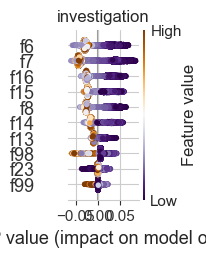

In [300]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()

ax1 = fig.add_subplot(111)
shap.summary_plot(np.vstack(shap_values_iter0[1][:, np.array(top10_iter0_inv)]),
                  np.vstack(test_scaled_features[:, np.array(top10_iter0_inv)]),
                  # plot_type='violin',
                  # class_inds=np.arange(10, 0, -1),
                  feature_names=[f'f{i}' for i in np.array(top10_iter0_inv)],
                  max_display=10, show=False, sort=False,
                  cmap='PuOr_r')
ax1.set_title(behaviors[1])

plt.gcf().set_size_inches(1, 2)
plt.show()
fig.savefig(f'../figures/summary_plot_iter0_decision_{class_labels[int(targets_test[row_index])]}_3.svg', dpi=600)

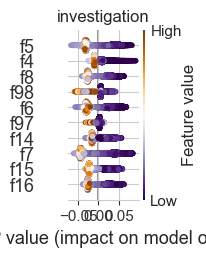

In [301]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()

ax1 = fig.add_subplot(111)
shap.summary_plot(np.vstack(shap_values_iter0[1][:, np.array(top10_unbal_inv)]),
                  np.vstack(test_scaled_features[:, np.array(top10_unbal_inv)]),
                  # plot_type='violin',
                  # class_inds=np.arange(10, 0, -1),
                  feature_names=[f'f{i}' for i in np.array(top10_unbal_inv)],
                  max_display=10, show=False, sort=False,
                  cmap='PuOr_r')
ax1.set_title(behaviors[1])

plt.gcf().set_size_inches(1, 2)
plt.show()
fig.savefig(f'../figures/summary_plot_unbal_decision_{class_labels[int(targets_test[row_index])]}_3.svg', dpi=600)

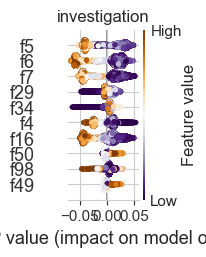

In [302]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()
ax1 = fig.add_subplot(111)
shap.summary_plot(np.vstack(shap_values_iter20[1][:, np.array(top10_iter20_inv)]),
                  np.vstack(test_scaled_features[:, np.array(top10_iter20_inv)]),
                  feature_names=[f'f{i}' for i in np.array(top10_iter20_inv)],
                  max_display=10, show=False, sort=False,
                  cmap='PuOr_r')
ax1.set_title(behaviors[1])

plt.gcf().set_size_inches(1, 2)
plt.show()
fig.savefig(f'../figures/summary_plot_iter20_decision_{class_labels[int(targets_test[row_index])]}_3.svg', dpi=600)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


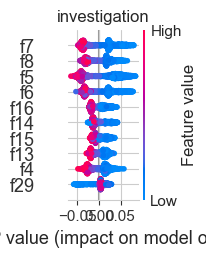

In [134]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()

ax1 = fig.add_subplot(111)
shap.summary_plot(np.vstack([shap_values_unbal[1][i, np.array(top10_unbal)] for i in list(active_diff_idx)]),
                  np.vstack([test_scaled_features[i, np.array(top10_unbal)] for i in list(active_diff_idx)]),
                  # plot_type='violin',
                  # class_inds=np.arange(10, 0, -1),
                  feature_names=[f'f{i}' for i in np.array(top10_unbal)],
                  max_display=10, show=False, sort=False)
ax1.set_title(behaviors[1])

plt.gcf().set_size_inches(1, 2)
plt.show()
fig.savefig(f'../figures/summary_plot_unbal_decision_{class_labels[int(targets_test[row_index])]}.svg', dpi=600)

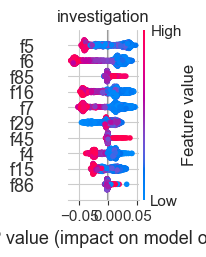

In [132]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()
ax1 = fig.add_subplot(111)
shap.summary_plot(np.vstack([shap_values_iter20[1][i, np.array(top10_active)] for i in list(active_diff_idx)]),
                  np.vstack([test_scaled_features[i, np.array(top10_active)] for i in list(active_diff_idx)]),
                  feature_names=[f'f{i}' for i in np.array(top10_active)],
                  max_display=10, show=False, sort=False)
ax1.set_title(behaviors[1])

plt.gcf().set_size_inches(1, 2)
plt.show()
fig.savefig(f'../figures/summary_plot_active_decision_{class_labels[int(targets_test[row_index])]}.svg', dpi=600)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


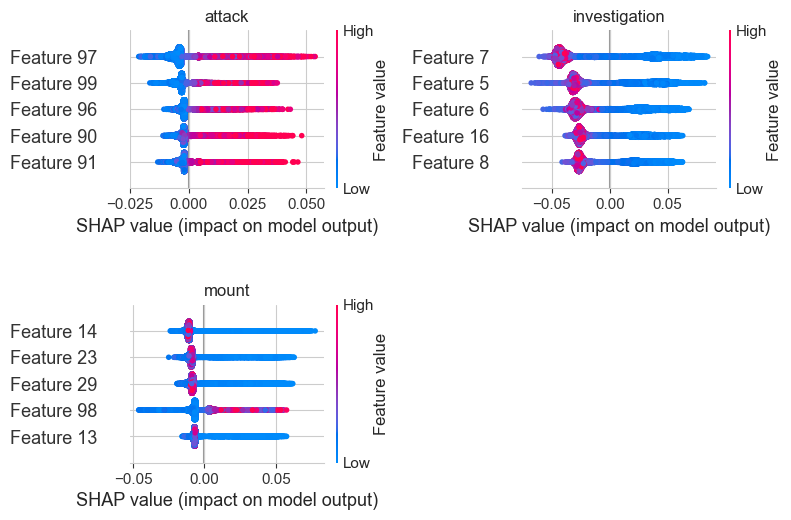

In [353]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()
ax0 = fig.add_subplot(221)
shap.summary_plot(shap_values_iter0[0], test_scaled_features,
                  max_display=5, show=False)
ax0.set_title(behaviors[0])

ax1 = fig.add_subplot(222)
shap.summary_plot(shap_values_iter0[1], test_scaled_features,
                  max_display=5, show=False)
ax1.set_title(behaviors[1])

ax2 = fig.add_subplot(223)
shap.summary_plot(shap_values_iter0[2], test_scaled_features,
                  max_display=5, show=False)
ax2.set_title(behaviors[2])


plt.gcf().set_size_inches(8, 6)
plt.show()

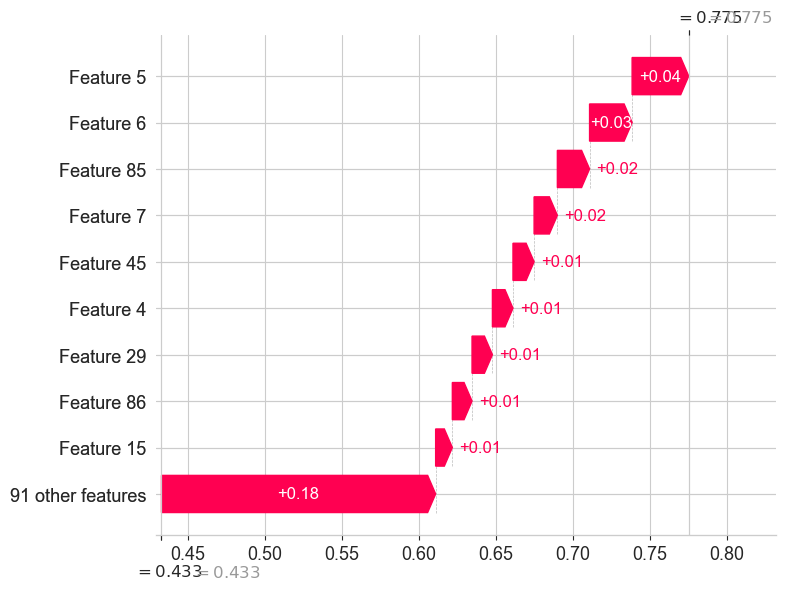

In [372]:
# shap.initjs()
row_index = 2146
shap.plots._waterfall.waterfall_legacy(expected_values_iter20[1], shap_values_iter20[1][row_index])

In [24]:
shap_interaction_values = shap.TreeExplainer(active_models[0]).shap_interaction_values(test_scaled_features[:50,:])

In [26]:
inds

array([ 5, 29, 15, 28, 94])

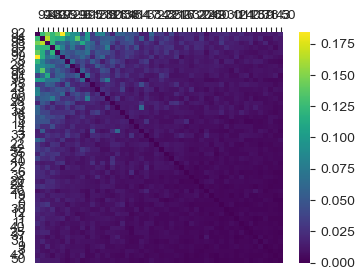

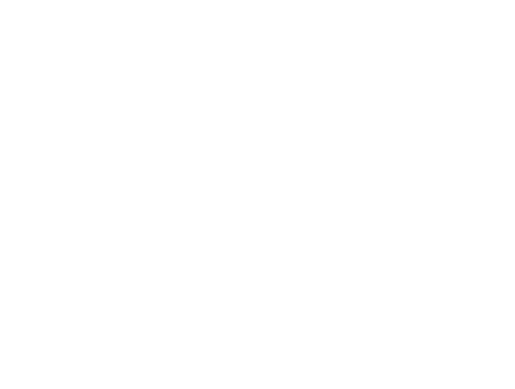

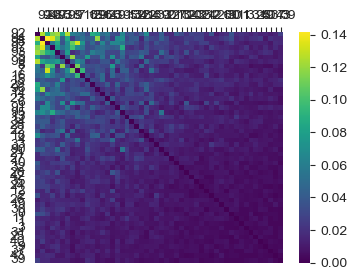

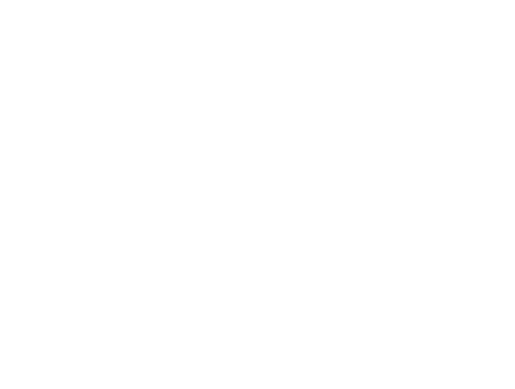

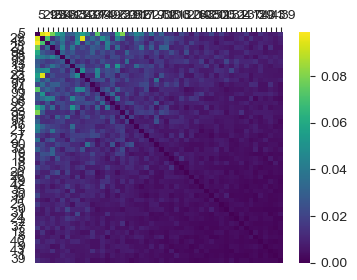

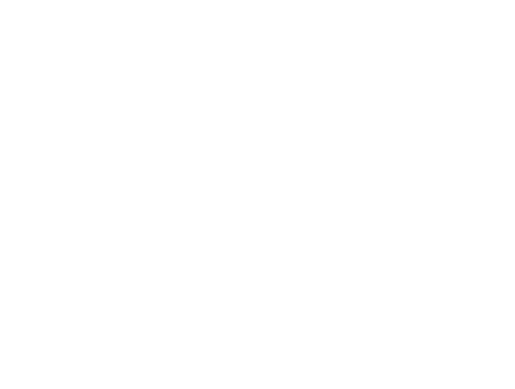

In [29]:
for class_selected in np.arange(3):
    tmp = np.abs(shap_interaction_values[class_selected]).sum(0)
    for i in range(tmp.shape[0]):
        tmp[i,i] = 0
    inds = np.argsort(-tmp.sum(0))[:50]
    tmp2 = tmp[inds,:][:,inds]
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    sns.heatmap(tmp2, cmap='viridis', ax=ax)
    ax.set_yticks(np.arange(0.5, tmp2.shape[0]+.5), inds, rotation=0, horizontalalignment="right")
    ax.set_xticks(np.arange(0.5, tmp2.shape[0]+.5), inds, rotation=0, horizontalalignment="left")
    plt.gca().xaxis.tick_top()
    plt.show()
    plt.axis('off')

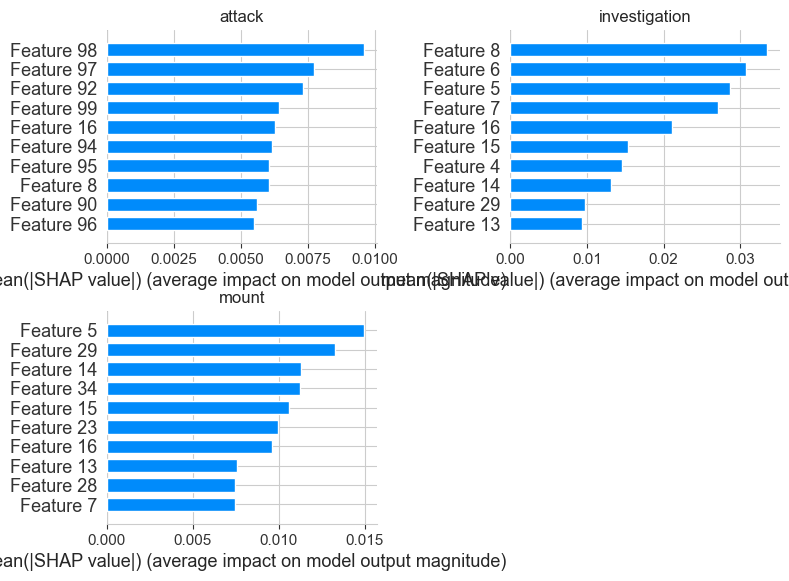

In [360]:
behaviors = ['attack', 'investigation', 'mount']
fig = plt.figure()
ax0 = fig.add_subplot(221)
shap.summary_plot(shap_values_iter20[0], test_scaled_features,
                  max_display=10, show=False, plot_type="bar")
ax0.set_title(behaviors[0])

ax1 = fig.add_subplot(222)
shap.summary_plot(shap_values_iter20[1], test_scaled_features,
                  max_display=10, show=False, plot_type="bar")
ax1.set_title(behaviors[1])

ax2 = fig.add_subplot(223)
shap.summary_plot(shap_values_iter20[2], test_scaled_features,
                  max_display=10, show=False, plot_type="bar")
ax2.set_title(behaviors[2])


plt.gcf().set_size_inches(8, 6)
plt.show()

In [351]:
shap_values_unbal[0].shape, unbal_feats[0].shape

((21830, 100), (42275, 100))

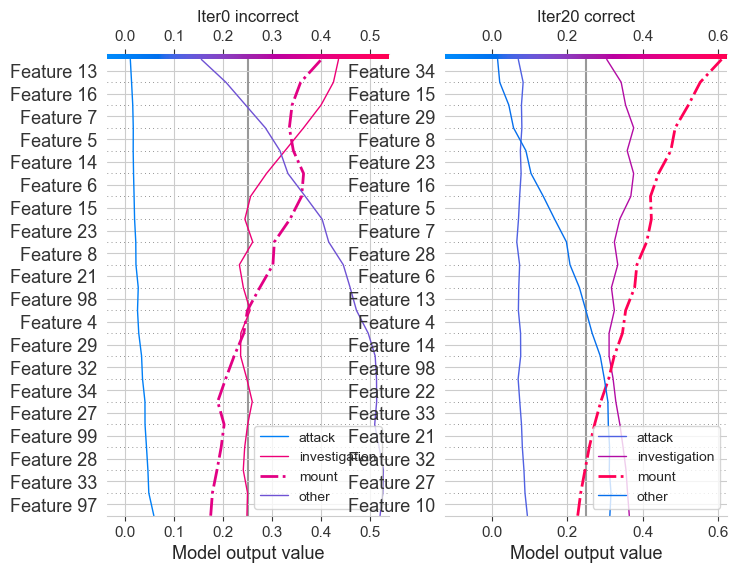

In [99]:
example_num = 100
class_labels = ['attack', 'investigation', 'mount', 'other']
row_index = idx_notother[list(improvement_idx)[example_num]]
fig = plt.figure()
ax0 = fig.add_subplot(121)
shap.multioutput_decision_plot(list(expected_values_iter0),
                               shap_values_iter0,
                               row_index=row_index,
                               # feature_names=heart_feature_names,
                               highlight=int(targets_test[row_index]),
                               legend_labels=class_labels,
                               legend_location='lower right',
                               show=False,
                               )
ax0.set_title('Iter0 incorrect')

ax1 = fig.add_subplot(122)
shap.multioutput_decision_plot(list(expected_values_iter20),
                               shap_values_iter20,
                               row_index=row_index,
                               # feature_names=heart_feature_names,
                               highlight=int(targets_test[row_index]),
                               legend_labels=class_labels,
                               legend_location='lower right',
                               show=False,
                               )
ax1.set_title('Iter20 correct')


plt.gcf().set_size_inches(8, 6)
plt.show()